In [ ]:
PROJECT ---> Loan approval prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score


In [4]:
df=pd.read_csv('loan pred.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.duplicated().isnull().sum()  # no duplicated values

0

### filling the missing values

In [9]:
----> CATEGORICAL COLUMNS

SyntaxError: invalid syntax (3542984029.py, line 1)

######  Gender category

<Axes: xlabel='Gender', ylabel='count'>

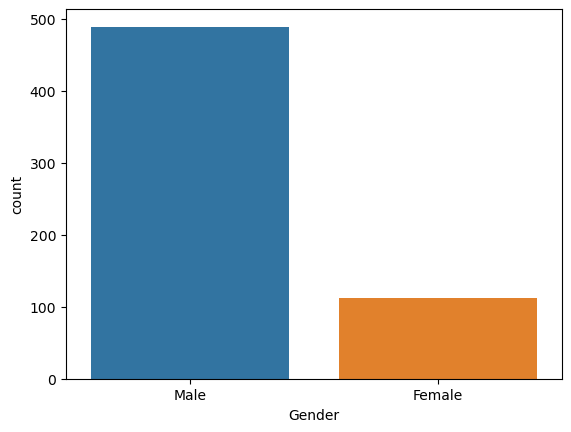

In [10]:
sns.countplot(x="Gender",data=df)

<Axes: ylabel='count'>

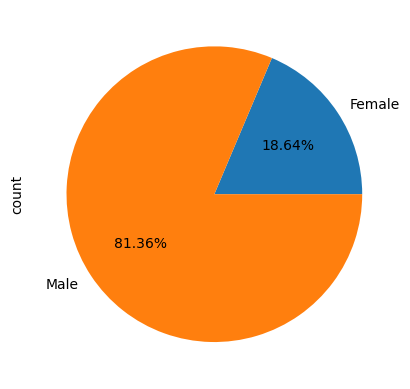

In [11]:
df.groupby('Gender')["Gender"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [12]:
As males are very high so we will fill missing values by males category only

SyntaxError: invalid syntax (2883772184.py, line 1)

In [15]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)# applied index

In [16]:
df['Gender'].isnull().sum()

0

<Axes: ylabel='count'>

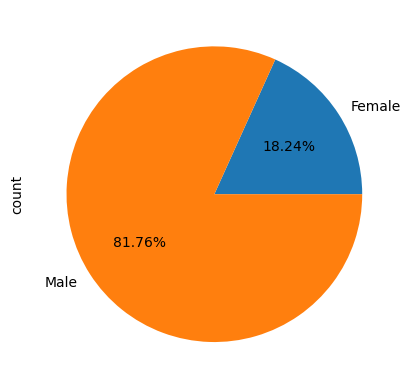

In [17]:
df.groupby('Gender')["Gender"].value_counts().plot(kind="pie",autopct="%0.2f%%")

###### Married

C:\Users\sahus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


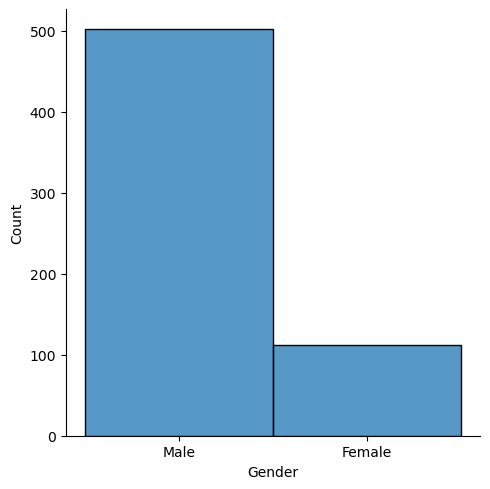

In [18]:
sns.displot(x="Gender",data=df,)

<Axes: xlabel='Married', ylabel='count'>

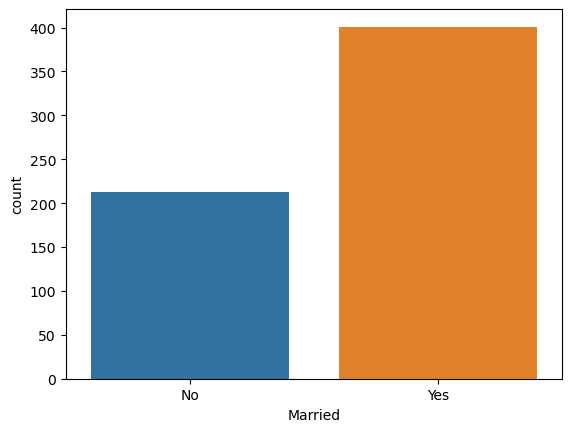

In [19]:
sns.countplot(x="Married",data=df)

<Axes: ylabel='count'>

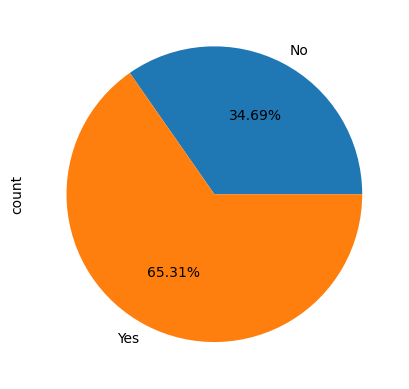

In [20]:
df.groupby("Married")["Married"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [21]:
df["Married"].fillna(df["Married"].mode()[0],inplace=True)# applied index

In [22]:
df["Married"].isnull().sum()

0

<Axes: ylabel='count'>

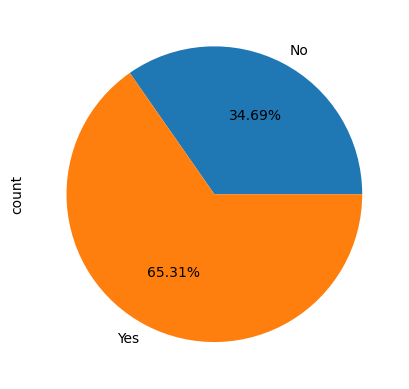

In [23]:
df.groupby("Married")["Married"].value_counts().plot(kind="pie",autopct="%0.2f%%")

###### 

######  dependents

<Axes: xlabel='Dependents', ylabel='count'>

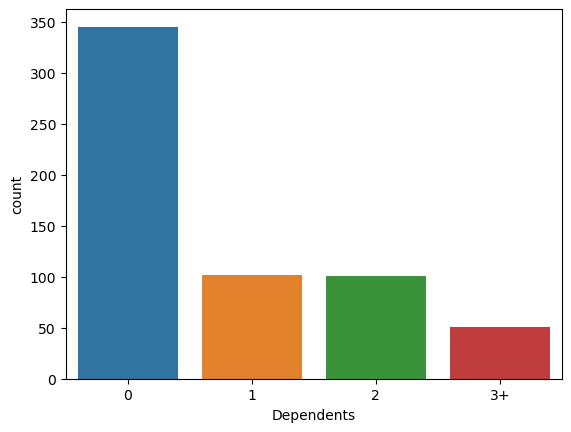

In [24]:
sns.countplot(x="Dependents",data=df)

<Axes: ylabel='count'>

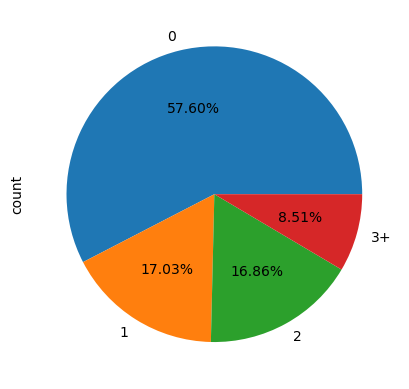

In [25]:
df.groupby("Dependents")["Dependents"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [26]:
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)# applied index

In [27]:
df["Dependents"].isnull().sum()

0

<Axes: ylabel='count'>

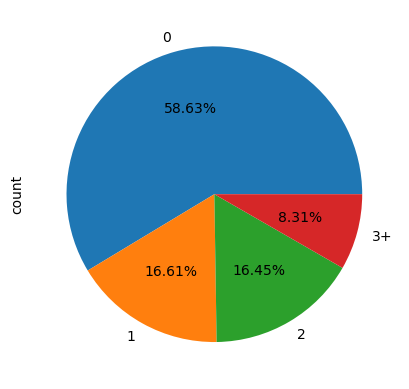

In [28]:
df.groupby("Dependents")["Dependents"].value_counts().plot(kind="pie",autopct="%0.2f%%")

###### Self_Employed

<Axes: xlabel='Self_Employed', ylabel='count'>

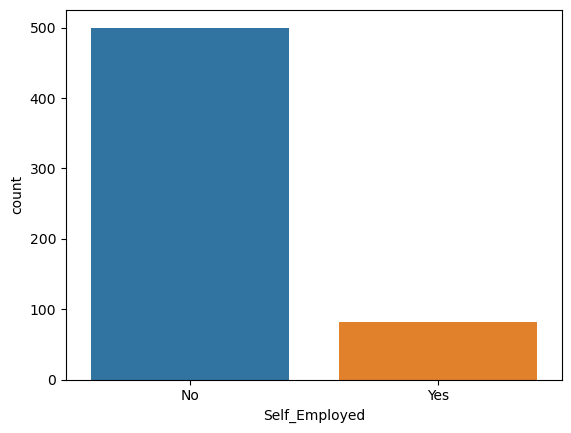

In [29]:
sns.countplot(x="Self_Employed",data=df)

<Axes: ylabel='count'>

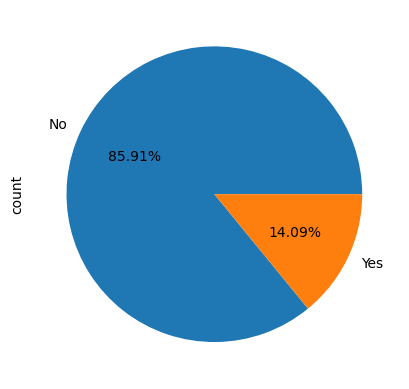

In [30]:
df.groupby("Self_Employed")["Self_Employed"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [31]:
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)# applied index

In [32]:
df["Self_Employed"].isnull().sum()

0

<Axes: ylabel='count'>

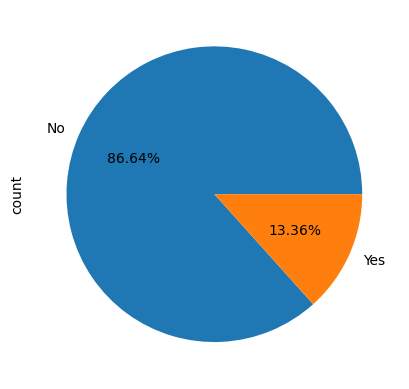

In [33]:
df.groupby("Self_Employed")["Self_Employed"].value_counts().plot(kind="pie",autopct="%0.2f%%")

###### Credit_History

<Axes: xlabel='Credit_History', ylabel='count'>

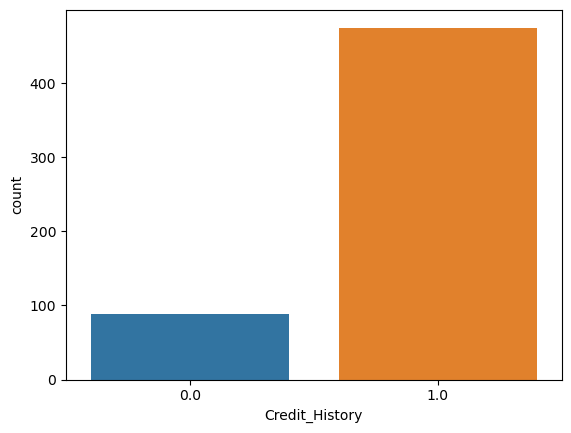

In [34]:
sns.countplot(x="Credit_History",data=df)

<Axes: ylabel='count'>

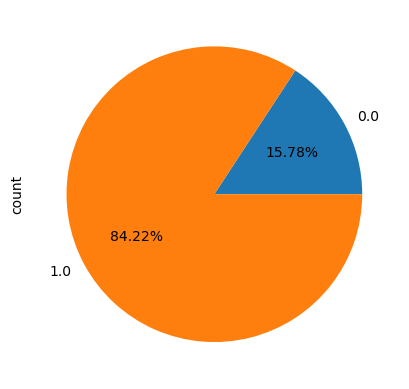

In [35]:
df.groupby("Credit_History")["Credit_History"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [36]:
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)# applied index

In [37]:
df["Credit_History"].isnull().sum()

0

<Axes: ylabel='count'>

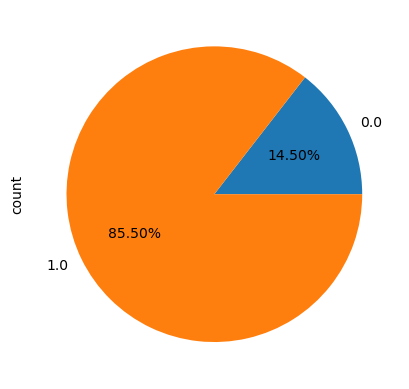

In [38]:
df.groupby("Credit_History")["Credit_History"].value_counts().plot(kind="pie",autopct="%0.2f%%")

###### Loan_Amount_Term

In [39]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

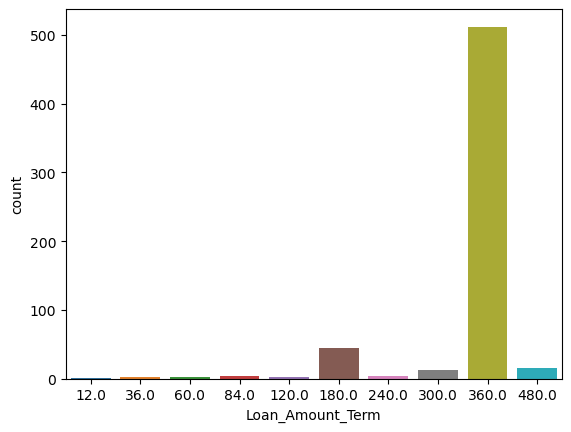

In [40]:
sns.countplot(x='Loan_Amount_Term',data=df)

<Axes: ylabel='count'>

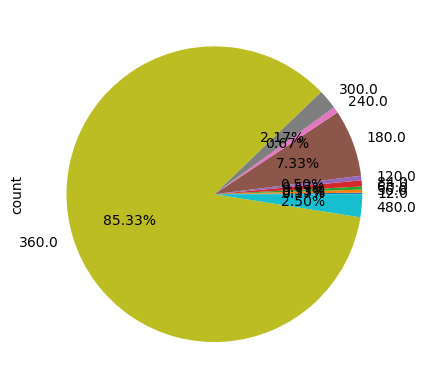

In [41]:
df.groupby('Loan_Amount_Term')['Loan_Amount_Term'].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [42]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)# applied index

In [43]:
df['Loan_Amount_Term'].isnull().sum()

0

<Axes: ylabel='count'>

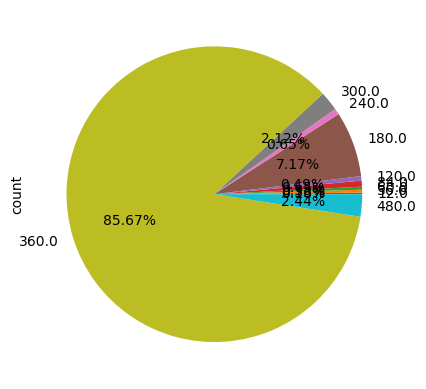

In [44]:
df.groupby('Loan_Amount_Term')['Loan_Amount_Term'].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [45]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
--> NUMERICAL COLUMNS

SyntaxError: invalid syntax (1090117556.py, line 1)

<Axes: xlabel='LoanAmount', ylabel='Count'>

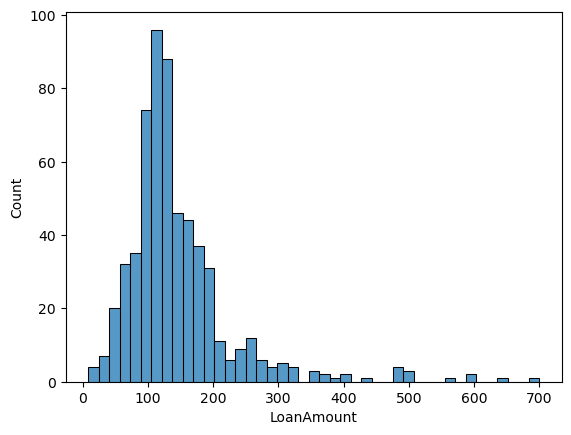

In [47]:
sns.histplot(x="LoanAmount",data=df)

In [48]:
df['LoanAmount'].skew()   # right skewed

2.677551679256059

In [49]:
df['LoanAmount_with_log']=np.log(df['LoanAmount'])

<Axes: xlabel='LoanAmount_with_log', ylabel='Count'>

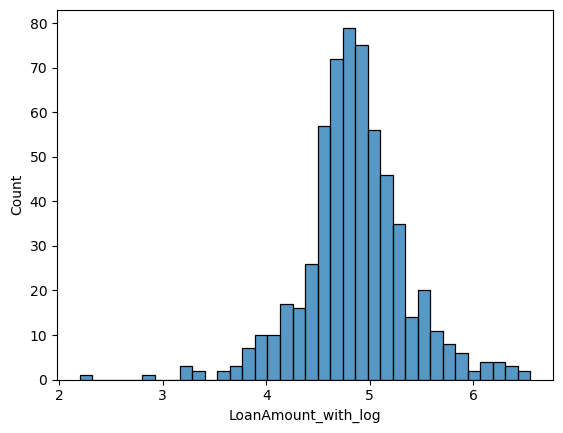

In [50]:
sns.histplot(x='LoanAmount_with_log',data=df)

In [51]:
df['LoanAmount_with_log'].skew()

-0.19299810452881644

In [52]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [53]:
(df['LoanAmount'].mean())

145.75244299674267

In [54]:
(df['LoanAmount'].median())

128.0

In [55]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
LoanAmount_with_log    22
dtype: int64

In [56]:
df['Total_income']=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [57]:
df['LoanAmount_with_log']=df['LoanAmount_with_log'].fillna(df['LoanAmount_with_log'].median())

In [58]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_with_log,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0


In [59]:
from sklearn.preprocessing import LabelEncoder
gd=LabelEncoder()
col=df[["Gender","Married","Education","Loan_Status"]]
col
for i in col:
    df[i]=gd.fit_transform(df[i])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_with_log,Total_income
0,LP001002,1,0,0,0,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0
1,LP001003,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0
2,LP001005,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0
3,LP001006,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0
4,LP001008,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680,2900.0
610,LP002979,1,1,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879,4106.0
611,LP002983,1,1,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389,8312.0
612,LP002984,1,1,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109,7583.0


In [60]:
df['Dependents'].replace({"3+":"4"},inplace=True)

In [61]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_with_log', 'Total_income'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS (UNIVARIATE +BIVARAIATE +MULTIVARIATE)

<Axes: xlabel='Gender', ylabel='count'>

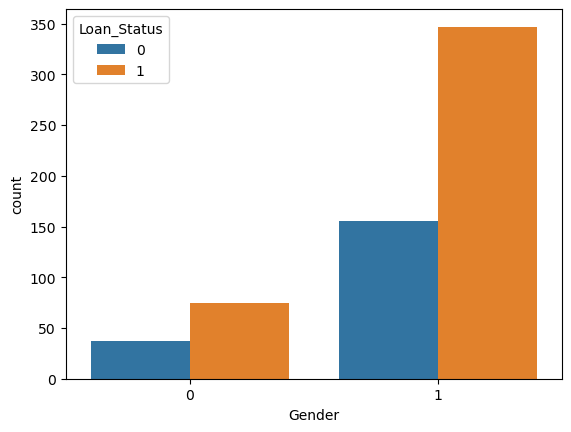

In [62]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

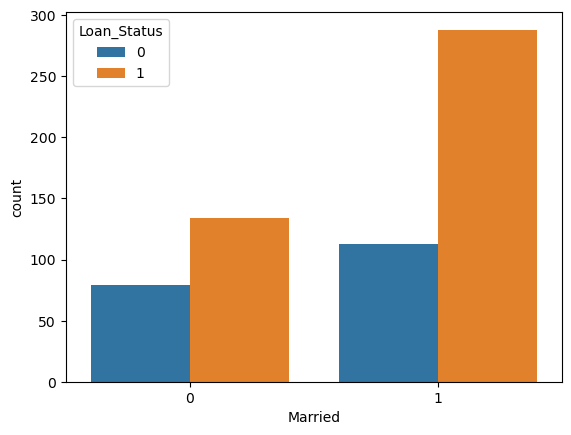

In [63]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

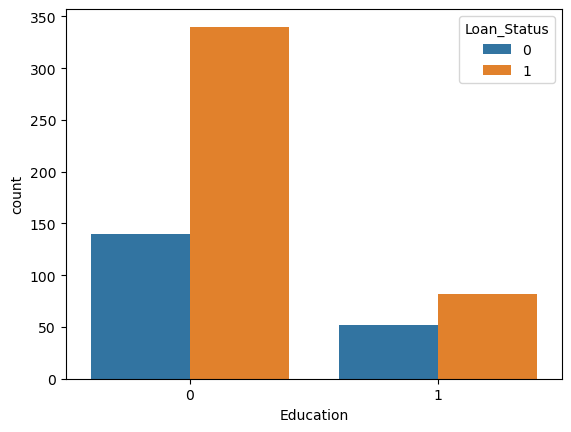

In [64]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

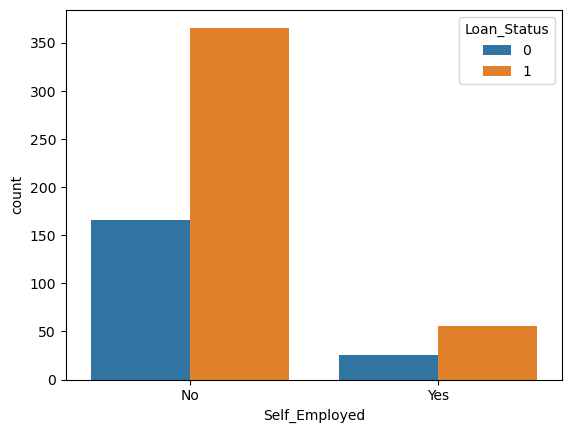

In [65]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='LoanAmount', ylabel='Density'>

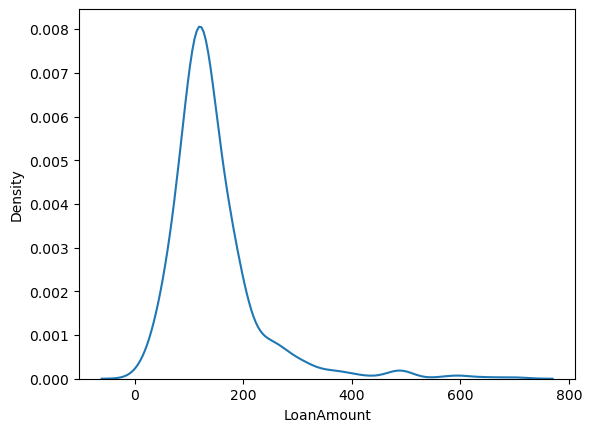

In [66]:
sns.kdeplot(x="LoanAmount",data=df)

<Axes: xlabel='Total_income', ylabel='Density'>

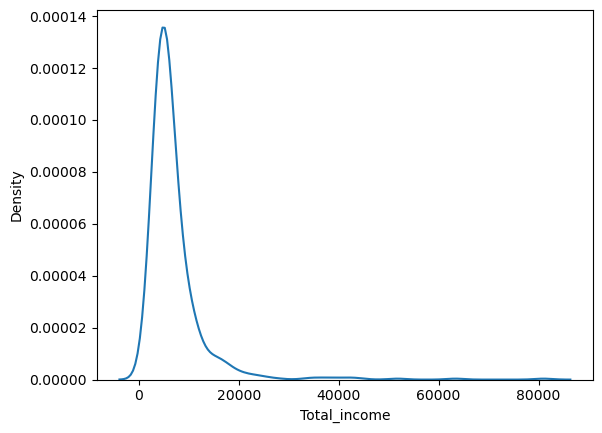

In [67]:
sns.kdeplot(x='Total_income',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

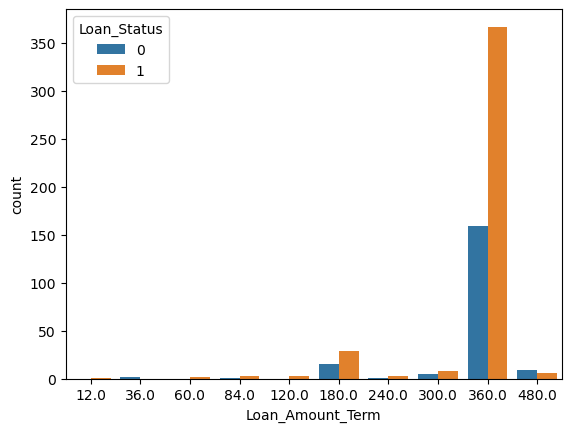

In [68]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

In [69]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_with_log', 'Total_income'],
      dtype='object')

<Axes: xlabel='Credit_History', ylabel='count'>

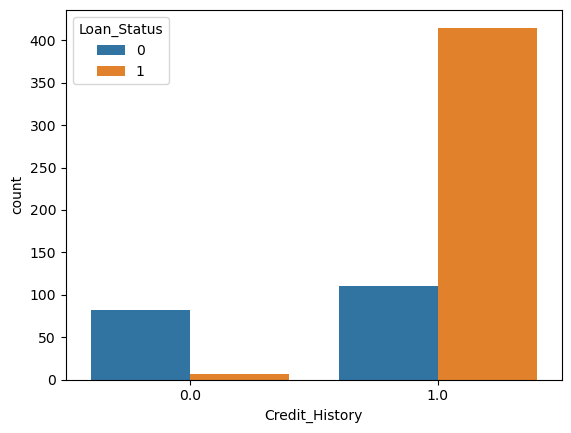

In [70]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

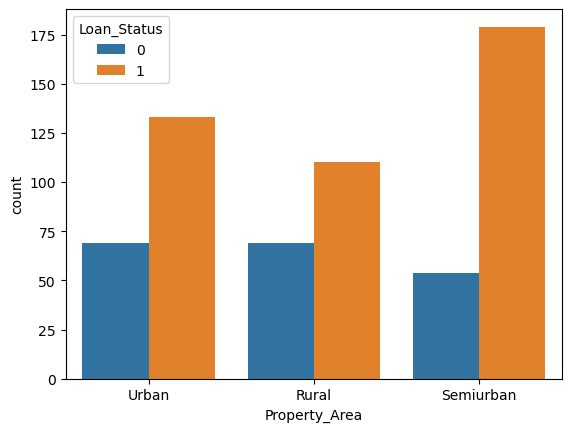

In [71]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

# ----> Training the data

In [72]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]]

In [73]:
x

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,LoanAmount_with_log,Total_income
0,1,0,0,0,360.0,1.0,4.852030,5849.0
1,1,1,1,0,360.0,1.0,4.852030,6091.0
2,1,1,0,0,360.0,1.0,4.189655,3000.0
3,1,1,0,1,360.0,1.0,4.787492,4941.0
4,1,0,0,0,360.0,1.0,4.948760,6000.0
...,...,...,...,...,...,...,...,...
609,0,0,0,0,360.0,1.0,4.262680,2900.0
610,1,1,4,0,180.0,1.0,3.688879,4106.0
611,1,1,1,0,360.0,1.0,5.533389,8312.0
612,1,1,2,0,360.0,1.0,5.231109,7583.0


In [74]:
y=df.iloc[:,12]

In [75]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [76]:
df.dtypes

Loan_ID                 object
Gender                   int32
Married                  int32
Dependents              object
Education                int32
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status              int32
LoanAmount_with_log    float64
Total_income           float64
dtype: object

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
len(x_train)

491

In [79]:
len(y_train)

491

In [80]:
len(x_test)

123

In [81]:
len(y_test)

123

In [82]:
x_train

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,LoanAmount_with_log,Total_income
90,1,1,0,0,360.0,1.0,4.875197,5858.0
533,1,0,1,0,360.0,1.0,5.278115,11250.0
452,1,1,0,0,360.0,0.0,5.003946,5681.0
355,0,0,0,0,180.0,1.0,4.753590,3813.0
266,1,1,2,0,360.0,1.0,5.010635,6095.0
...,...,...,...,...,...,...,...,...
277,1,1,0,0,360.0,1.0,4.382027,4403.0
9,1,1,1,0,360.0,1.0,5.855072,23809.0
359,1,1,4,0,360.0,1.0,5.298317,8334.0
192,1,1,0,1,360.0,1.0,5.075174,6033.0


In [83]:
y_train

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int32

In [84]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
x_train=sta.fit_transform(x_train)
x_test=sta.fit_transform(x_test)

In [85]:
x_train

array([[ 0.47374983,  0.71143163, -0.70504939, ...,  0.41790088,
         0.03528366, -0.18578759],
       [ 0.47374983, -1.40561644,  0.11918692, ...,  0.41790088,
         0.8314546 ,  0.59265746],
       [ 0.47374983,  0.71143163, -0.70504939, ..., -2.39291191,
         0.28969366, -0.21134115],
       ...,
       [ 0.47374983,  0.71143163,  2.59189586, ...,  0.41790088,
         0.87137547,  0.17167345],
       [ 0.47374983,  0.71143163, -0.70504939, ...,  0.41790088,
         0.43044033, -0.16052278],
       [-2.11081869,  0.71143163, -0.70504939, ...,  0.41790088,
         0.68501609, -0.095123  ]])

In [86]:
x_test

array([[ 0.46671381, -1.25      , -0.59633956, -0.51772699,  0.28661682,
         0.3866946 , -0.94398688,  0.13465755],
       [-2.14264068, -1.25      , -0.59633956, -0.51772699,  0.28661682,
         0.3866946 , -0.30660703, -0.57724973],
       [ 0.46671381,  0.8       , -0.59633956, -0.51772699,  0.28661682,
         0.3866946 ,  2.04687066,  0.87125093],
       [ 0.46671381,  0.8       , -0.59633956, -0.51772699,  0.28661682,
         0.3866946 , -0.34652829,  0.05960182],
       [ 0.46671381,  0.8       ,  1.07070057, -0.51772699,  0.28661682,
         0.3866946 , -0.62517921, -0.6657706 ],
       [ 0.46671381,  0.8       , -0.59633956,  1.93151993, -2.33124469,
        -2.58602011,  0.55180816, -0.12142959],
       [ 0.46671381,  0.8       ,  2.73774069, -0.51772699, -2.33124469,
         0.3866946 ,  0.44169505, -0.0319113 ],
       [ 0.46671381, -1.25      , -0.59633956, -0.51772699,  0.28661682,
         0.3866946 ,  2.54126089,  1.57866982],
       [ 0.46671381, -1.25      

### Logistic regression

In [87]:
log=LogisticRegression()

In [88]:
log.fit(x_train,y_train)

LogisticRegression()

In [89]:
y_pred=log.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [90]:
from sklearn.metrics import accuracy_score,r2_score

In [91]:
ACCURACY=(accuracy_score(y_test,y_pred))*100
ACCURACY

82.92682926829268

In [92]:
(np.mean(cross_val_score(log,x,y,cv=5)))*100

C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

80.78368652538984

### decision tree classifier

In [93]:
deci=DecisionTreeClassifier()

In [94]:
deci.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred1=deci.predict(x_test)
y_pred1

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [96]:
ACCURACY1=(accuracy_score(y_test,y_pred1))*100
ACCURACY1

67.47967479674797

In [97]:
(np.mean(cross_val_score(deci,x,y,cv=5)))*100

70.03198720511796

### suppport vector machine

In [98]:
svc=SVC()

In [99]:
svc.fit(x_train,y_train)

SVC()

In [100]:
y_pred2=svc.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [101]:
ACCURACY2=(accuracy_score(y_test,y_pred2))*100
ACCURACY2

82.92682926829268

In [102]:
(np.mean(cross_val_score(svc,x,y,cv=5)))*100

68.40330534452886

### GaussianNB

In [103]:
gau=GaussianNB()

In [104]:
gau.fit(x_train,y_train)

GaussianNB()

In [105]:
y_pred3=gau.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [106]:
ACCURACY3=(accuracy_score(y_test,y_pred3))*100
ACCURACY3

83.73983739837398

In [107]:
(np.mean(cross_val_score(gau,x,y,cv=5)))*100

79.97201119552179

### KNeighborsClassifier

In [108]:
knnc=KNeighborsClassifier()

In [109]:
knnc.fit(x_train,y_train)

KNeighborsClassifier()

In [110]:
y_pred4=knnc.predict(x_test)
y_pred4

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [111]:
ACCURACY4=(accuracy_score(y_test,y_pred4))*100
ACCURACY4

79.67479674796748

In [112]:
(np.mean(cross_val_score(knnc,x,y,cv=5)))*100

61.239504198320674

### Random forest classifier

In [113]:
ran=RandomForestClassifier()

In [114]:
ran.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
y_pred5=ran.predict(x_test)
y_pred5

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [116]:
ACCURACY4=(accuracy_score(y_test,y_pred5))*100
ACCURACY4

73.98373983739837

In [117]:
(np.mean(cross_val_score(ran,x,y,cv=5)))*100

76.71331467413034

In [118]:
from sklearn.metrics import classification_report

In [119]:

print("---------logistic regresion----------->","\n","\n",classification_report(y_test,y_pred))
print("\n")
print("---------Decision tree classifier----------->","\n","\n",classification_report(y_test,y_pred1))
print("\n")
print("---------support vector machine----------->","\n","\n",classification_report(y_test,y_pred2))
print("\n")
print("---------gausian nb----------->","\n","\n",classification_report(y_test,y_pred3))
print("\n")
print("---------k nearest neighbor----------->","\n","\n",classification_report(y_test,y_pred4))
print("\n")
print("---------Random forest classifier----------->","\n","\n",classification_report(y_test,y_pred))


---------logistic regresion-----------> 
 
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



---------Decision tree classifier-----------> 
 
               precision    recall  f1-score   support

           0       0.44      0.79      0.57        33
           1       0.89      0.63      0.74        90

    accuracy                           0.67       123
   macro avg       0.67      0.71      0.65       123
weighted avg       0.77      0.67      0.69       123



---------support vector machine-----------> 
 
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                        